# PA - Estatística - Pós Graduação CDS

Samanta Nogueira de Souza Sobral

## Imports:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from funcoes import (estatisticas, histogramas, dispersao, 
                     box_plot, formato_data, z_score_col)


## Dataset:

In [2]:
desenvolvimento = pd.read_csv("base_desenvolvimento.csv", index_col = 0)
validacao = pd.read_csv("base_validacao.csv", index_col = 0)
base_completa = pd.read_csv("base_completa.csv", index_col = 0)

#Ajustando a visualização dos números decimais:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Análise dos dados de desenvolvimento:

In [3]:
#Calculando quantidade, média, mediana, desvio-padrão, 
# 1 quartil, 2 quartil, 3 quartil, máximo e intervalo interquartílico (IQR):

estatisticas(desenvolvimento)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_weight_g,68799.000,2084.891,3730.175,0.000,300.000,700.000,1800.000,40425.000,700.000,1500.000
1,product_volume_cm3,68799.000,15147.262,23294.691,168.000,2816.000,6375.000,18375.000,296208.000,6375.000,15559.000
2,dist_degrees,68799.000,5.565,5.391,0.000,1.750,4.071,7.408,79.601,4.071,5.657
3,delta_time_dataset,68799.000,23.895,8.770,-5.000,18.000,23.000,29.000,154.000,23.000,11.000
4,delta_time_real,68799.000,11.915,9.529,-7.000,6.000,10.000,15.000,208.000,10.000,9.000
5,error_model_dataset,68799.000,-11.980,10.217,-147.000,-17.000,-13.000,-7.000,188.000,-13.000,10.000
6,product_volume_l,68799.000,15.147,23.295,0.168,2.816,6.375,18.375,296.208,6.375,15.559
7,product_weight_kg,68799.000,2.085,3.730,0.000,0.300,0.700,1.800,40.425,0.700,1.500


In [4]:
#Selecionando as variáveis explicativas e a variável resposta:

dados = desenvolvimento[['product_weight_kg','product_volume_l',
                        'dist_degrees', 'delta_time_real']]

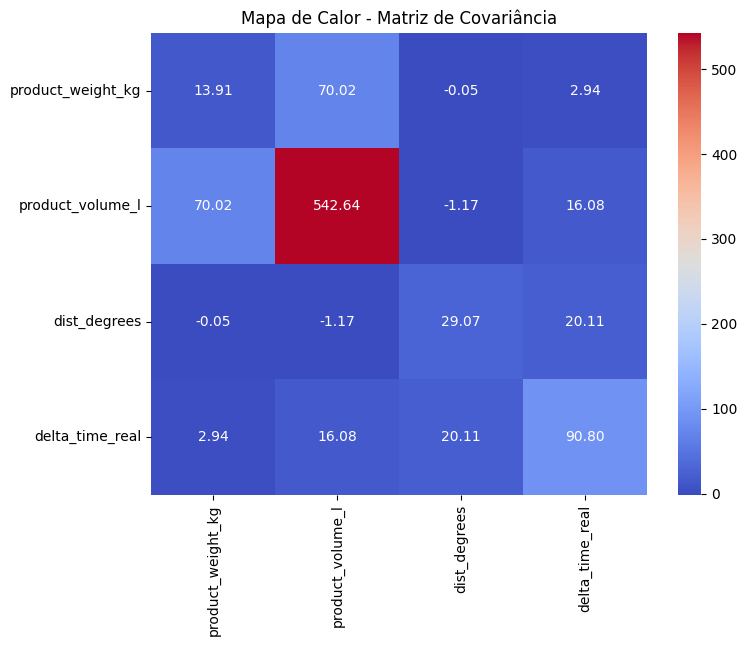

In [5]:
# Matriz de covariância
cov_matrix = dados.cov()

# Mapa de calor da matriz de covariância
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Matriz de Covariância")
plt.show();

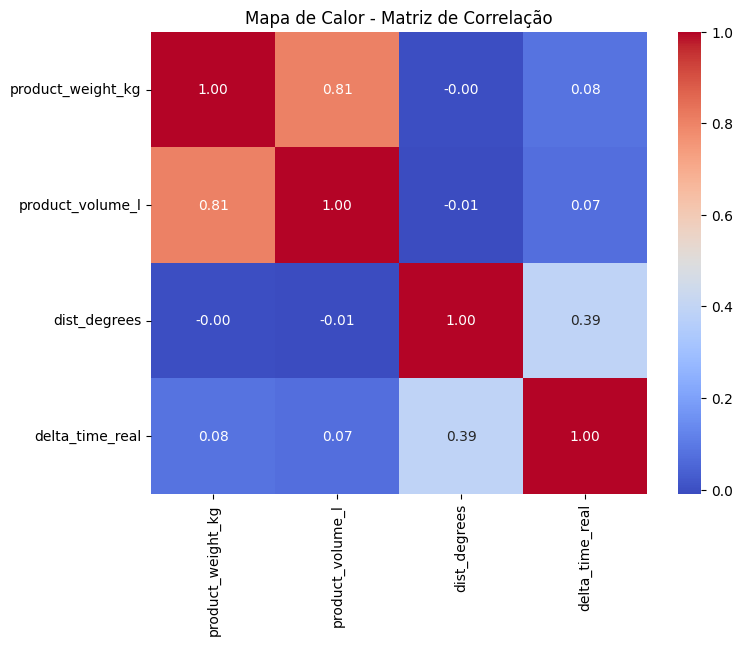

In [6]:
# Matriz de correlação
corr_matrix = dados.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Matriz de Correlação")
plt.show();

### Gráficos:

#### Histogramas:

In [7]:
#Filtrando os dados até o 3Q mais 1.5 o IQR, 
# em relação ao tempo de entrega, peso e volume:
aux1 = (dados[(dados['product_weight_kg'] <= 4.05) 
              & (dados['delta_time_real'] <= 28.5)
              & (dados['product_volume_l'] <= 41.7135)])

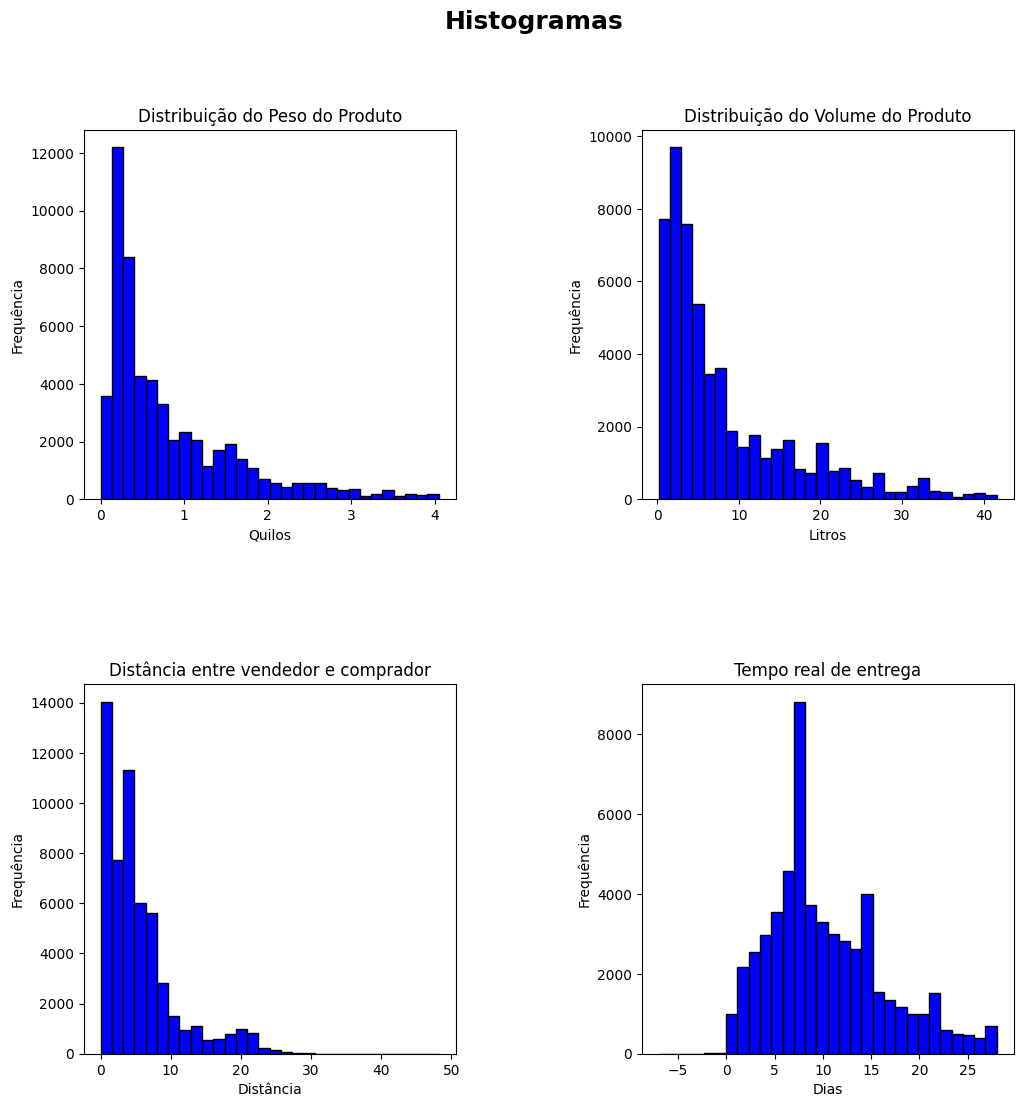

In [8]:

colunas = ['product_weight_kg', 'product_volume_l', 'dist_degrees', 'delta_time_real']
titulos = ['Distribuição do Peso do Produto', 'Distribuição do Volume do Produto', 
           'Distância entre vendedor e comprador', 'Tempo real de entrega']
xlabels = ['Quilos', 'Litros', 'Distância', 'Dias']

histogramas(aux1, colunas, titulos, xlabels)


#### Gráfico de dispersão:

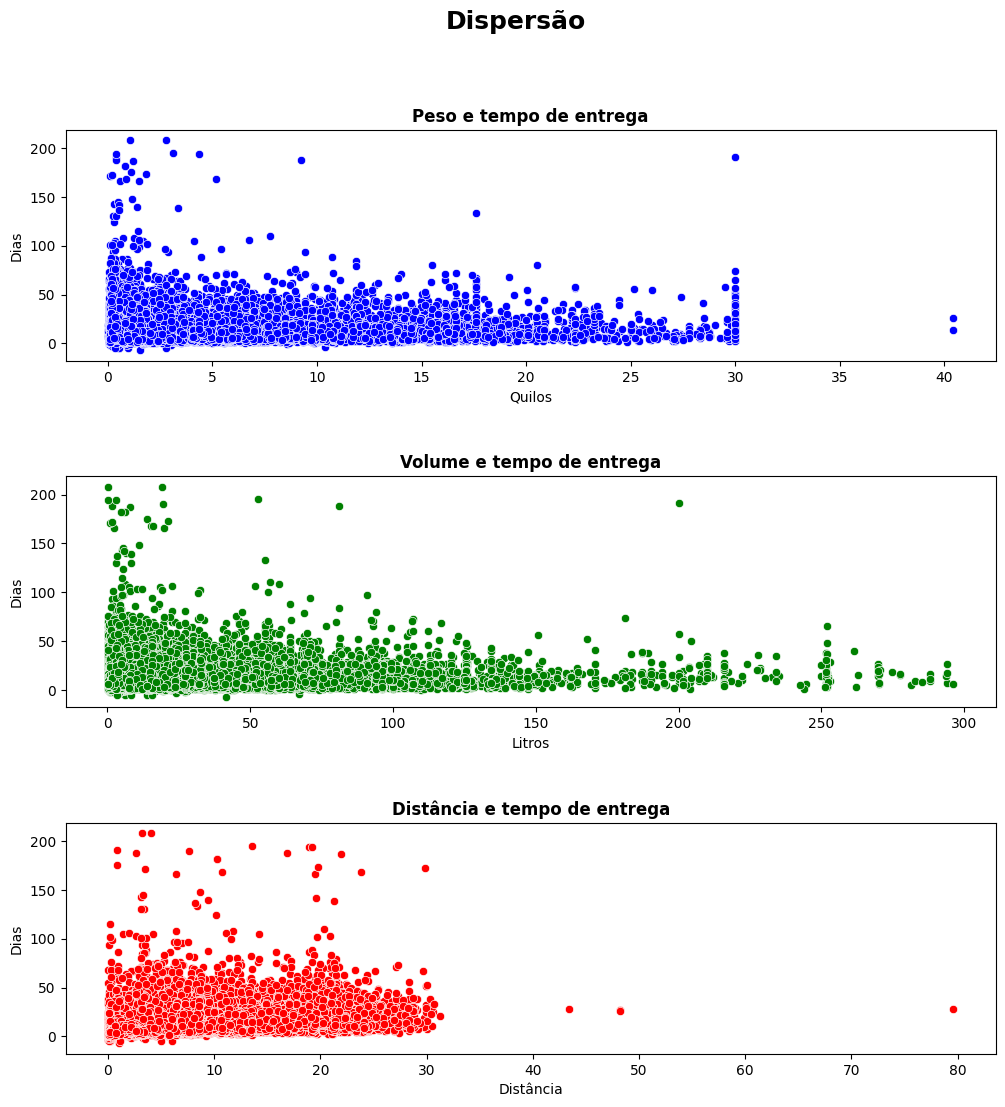

In [9]:
dispersao(dados,
          colunas=[('product_weight_kg', 'delta_time_real'), 
                   ('product_volume_l', 'delta_time_real'), 
                   ('dist_degrees', 'delta_time_real')],
          titulos=['Peso e tempo de entrega', 'Volume e tempo de entrega', 'Distância e tempo de entrega'],
          xlabels=['Quilos', 'Litros', 'Distância'],
          ylabels=['Dias', 'Dias', 'Dias'],
          colors=['blue', 'green', 'red'])

#### Box-plot:

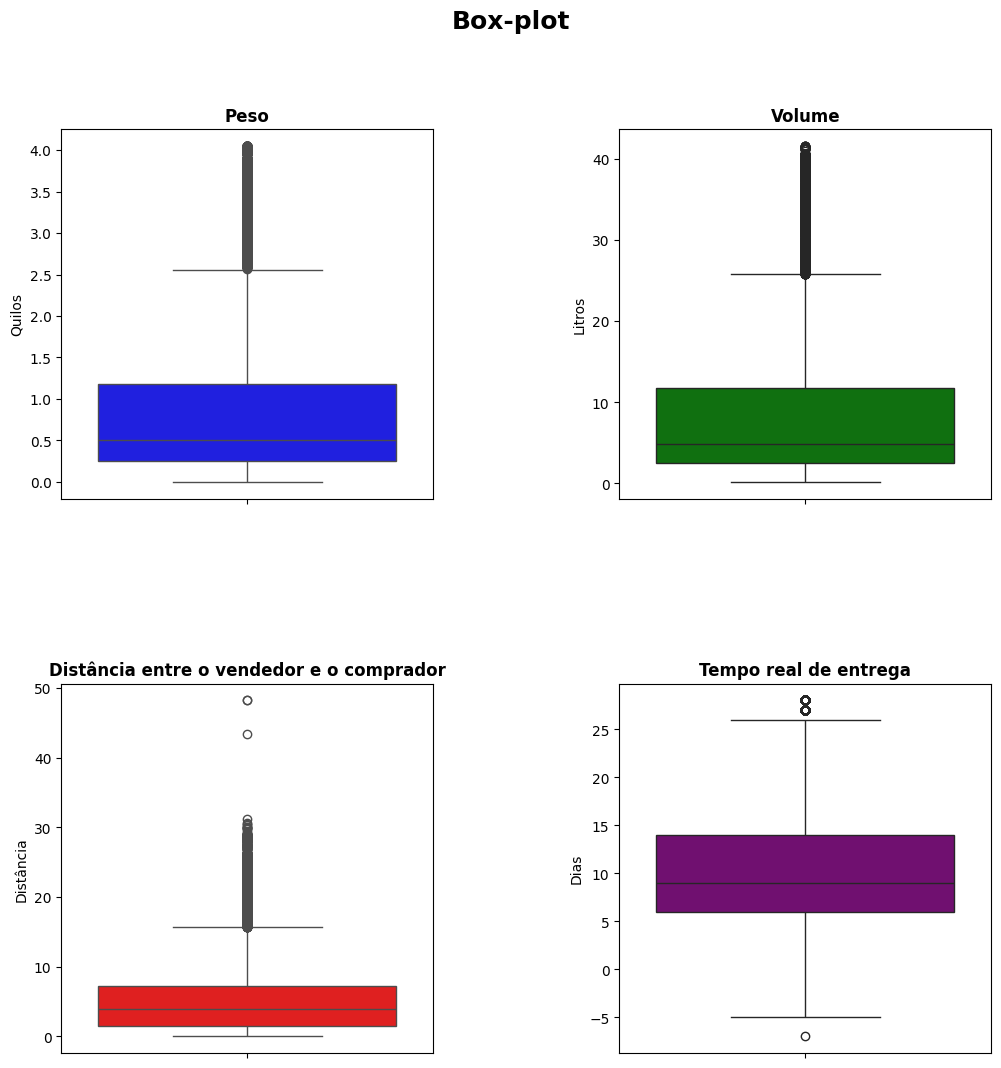

In [10]:
box_plot(aux1,
         colunas=['product_weight_kg', 'product_volume_l', 'dist_degrees', 'delta_time_real'],
         titulos=['Peso', 'Volume', 'Distância entre o vendedor e o comprador', 'Tempo real de entrega'],
         ylabels=['Quilos', 'Litros', 'Distância', 'Dias'],
         colors=['blue', 'green', 'red', 'purple'])

## Análise dos dados de validação:

In [11]:
estatisticas(validacao)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_weight_g,29486.000,2099.118,3745.710,0.000,300.000,700.000,1800.000,40425.000,700.000,1500.000
1,product_volume_cm3,29486.000,15170.610,23257.004,352.000,2856.000,6480.000,18240.000,288000.000,6480.000,15384.000
2,dist_degrees,29486.000,5.579,5.368,0.000,1.795,4.118,7.446,35.742,4.118,5.651
3,delta_time_dataset,29486.000,23.928,8.926,-6.000,19.000,23.000,29.000,140.000,23.000,10.000
4,delta_time_real,29486.000,11.895,9.441,-5.000,6.000,10.000,15.000,195.000,10.000,9.000
5,error_model_dataset,29486.000,-12.033,10.198,-124.000,-17.000,-13.000,-7.000,161.000,-13.000,10.000
6,product_volume_l,29486.000,15.171,23.257,0.352,2.856,6.480,18.240,288.000,6.480,15.384
7,product_weight_kg,29486.000,2.099,3.746,0.000,0.300,0.700,1.800,40.425,0.700,1.500


## Regressão Linear Múltipla (Modelo 1):

In [12]:
#Separando as variáveis explicativas e a resposta:
X = dados[['product_volume_l', 'product_weight_kg', 'dist_degrees']]
y = dados['delta_time_real']

X_df = sm.add_constant(X)  # Adiciona a constante (intercepto)

# Ajustando o modelo de regressão linear aos dados de desenvolvimento
modelo = sm.OLS(y, X_df).fit()

# Exibindo os coeficientes da regressão
print(modelo.summary())

intercepto = modelo.params['const']  # Obtém o intercepto
print(f"\nEquação da regressão: y = {intercepto:.2f}", end="")

# Iterando sobre todas as variáveis explicativas e seus coeficientes
for col in X_df.columns[1:]:  # Ignora a constante na primeira coluna
    coeficiente = modelo.params[col]
    print(f" + {coeficiente:.2f} * {col}", end="")

print()  # Quebra de linha no final

                            OLS Regression Results                            
Dep. Variable:        delta_time_real   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     4382.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        17:35:01   Log-Likelihood:            -2.4670e+05
No. Observations:               68799   AIC:                         4.934e+05
Df Residuals:                   68795   BIC:                         4.934e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.5688      0.05

In [13]:
#Criando a coluna delta_time_model_1 com as predições da regressão múltipla,
#usando a fórmula y = 7.57 + 0.01 * product_volume_l + 0.16 * product_weight_kg + 0.69 * dist_degrees :

base_completa['delta_time_model_1'] = (0.0102*base_completa['product_volume_l'] + 
                                       0.1622*base_completa['product_weight_kg'] +
                                       0.6925*base_completa['dist_degrees'] + 7.5688)

In [14]:
#Criando a coluna estimated_delivery_model_1 do modelo 1:

#Alterando o tipo de dado de order_approved_at e 'order_delivered_customer_date':
colunas = ['order_approved_at', 'order_delivered_customer_date']
base_modelos = formato_data(base_completa, colunas)

#calculando a coluna estimated_delivery_model1:
base_modelos['estimated_delivery_model_1'] = (base_modelos['order_approved_at'] +
                                              pd.to_timedelta(base_modelos['delta_time_model_1'], unit = 'D'))

In [15]:
#Criando a coluna de erro do  modelo 1:

base_modelos['error_model_1'] = (base_modelos['order_delivered_customer_date'] -
                                base_modelos['estimated_delivery_model_1'] ).dt.days


In [16]:
#verificando as estatísticas:
base_modelos['error_model_1'] = base_modelos['error_model_1'].astype('int64')

tabela = base_modelos[['product_volume_l', 'product_weight_kg', 
                       'dist_degrees', 'delta_time_real',
                       'delta_time_model_1', 'error_model_1']]


estatisticas(tabela)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_volume_l,98285.000,15.154,23.283,0.168,2.816,6.400,18.304,296.208,6.400,15.488
1,product_weight_kg,98285.000,2.089,3.735,0.000,0.300,0.700,1.800,40.425,0.700,1.500
2,dist_degrees,98285.000,5.569,5.384,0.000,1.762,4.084,7.419,79.601,4.084,5.656
3,delta_time_real,98285.000,11.909,9.503,-7.000,6.000,10.000,15.000,208.000,10.000,9.000
4,delta_time_model_1,98285.000,11.919,3.809,7.588,9.408,10.890,13.183,64.035,10.890,3.776
5,error_model_1,98285.000,-0.499,8.698,-37.000,-5.000,-3.000,2.000,197.000,-3.000,7.000


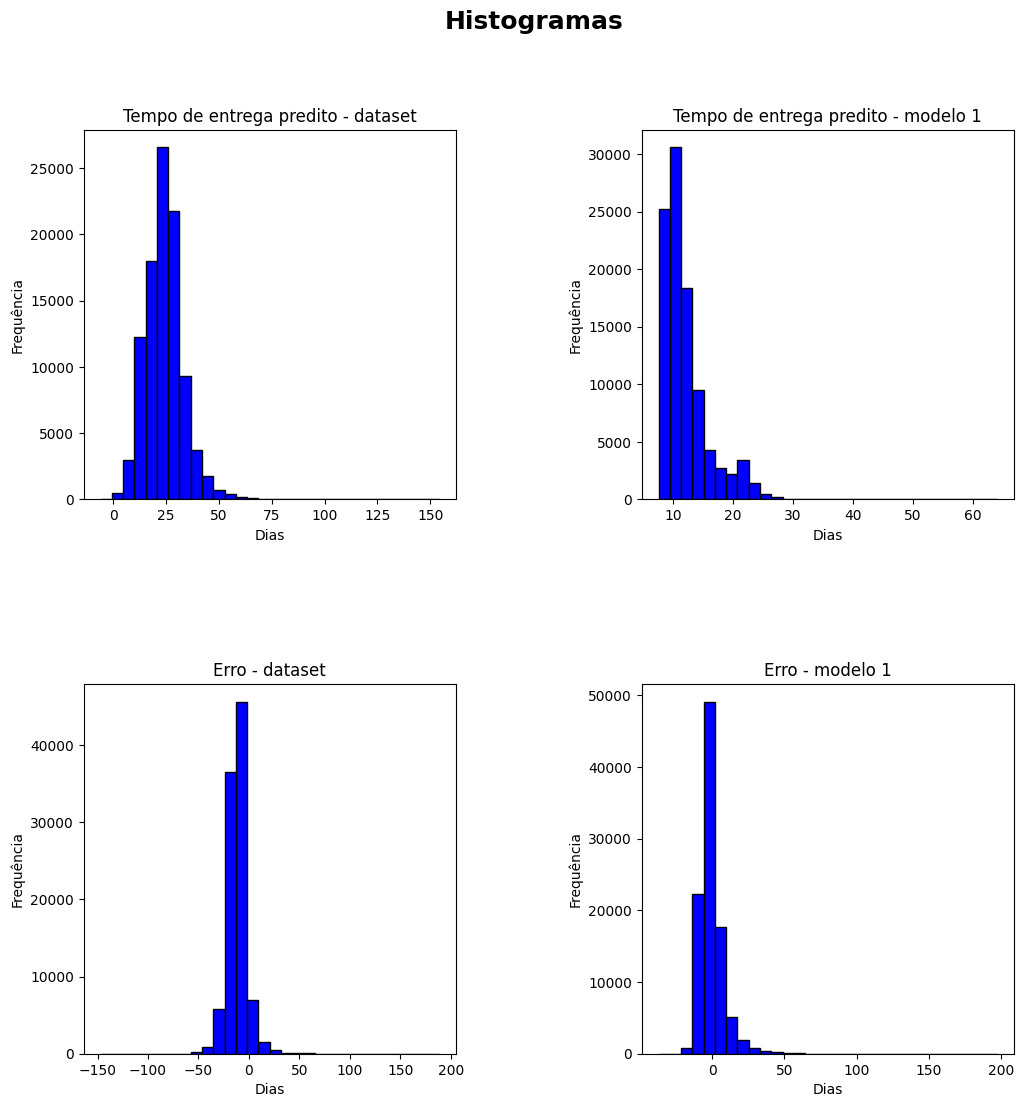

In [17]:
#Plotando os histogramas do modelo 1:


colunas = ['delta_time_dataset', 'delta_time_model_1', 'error_model_dataset', 'error_model_1' ]
titulos = ['Tempo de entrega predito - dataset', 'Tempo de entrega predito - modelo 1', 
           'Erro - dataset', 'Erro - modelo 1']
xlabels = ['Dias', 'Dias', 'Dias', 'Dias']

histogramas(base_modelos, colunas, titulos, xlabels)

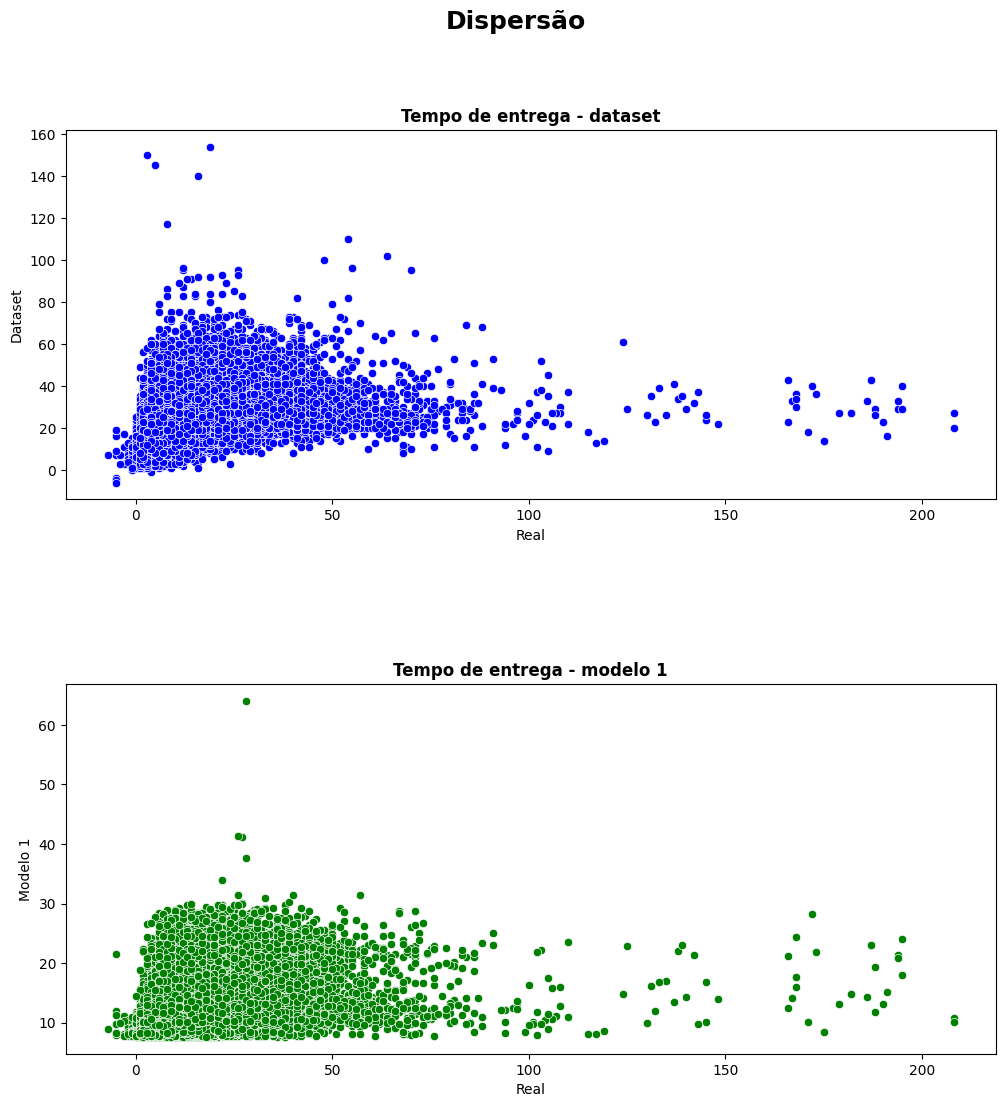

In [18]:
#Plotando os gráficos de dispersão do modelo 1 e do dataset:

dispersao(base_modelos,
          colunas=[('delta_time_real', 'delta_time_dataset'), 
                   ('delta_time_real', 'delta_time_model_1')],
          titulos=['Tempo de entrega - dataset', 'Tempo de entrega - modelo 1'],
          xlabels=['Real', 'Real'],
          ylabels=['Dataset', 'Modelo 1'],
          colors=['blue', 'green'])

## Regressão Linear Múltipla (Modelo 2):

### Dados de desenvolvimento:

In [19]:
#Calculando o z-score para as variáveis explicativas:

#Distância:
desenvolvimento = z_score_col(desenvolvimento, 'dist_degrees', 'z_score_dist')

#Peso:
desenvolvimento = z_score_col(desenvolvimento, 'product_weight_kg', 'z_score_weight')

#Peso:
desenvolvimento = z_score_col(desenvolvimento, 'product_volume_l', 'z_score_volume')


In [20]:
#Tabela resumo:
estatisticas(desenvolvimento)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_weight_g,68799.000,2084.891,3730.175,0.000,300.000,700.000,1800.000,40425.000,700.000,1500.000
1,product_volume_cm3,68799.000,15147.262,23294.691,168.000,2816.000,6375.000,18375.000,296208.000,6375.000,15559.000
2,dist_degrees,68799.000,5.565,5.391,0.000,1.750,4.071,7.408,79.601,4.071,5.657
3,delta_time_dataset,68799.000,23.895,8.770,-5.000,18.000,23.000,29.000,154.000,23.000,11.000
4,delta_time_real,68799.000,11.915,9.529,-7.000,6.000,10.000,15.000,208.000,10.000,9.000
5,error_model_dataset,68799.000,-11.980,10.217,-147.000,-17.000,-13.000,-7.000,188.000,-13.000,10.000
6,product_volume_l,68799.000,15.147,23.295,0.168,2.816,6.375,18.375,296.208,6.375,15.559
7,product_weight_kg,68799.000,2.085,3.730,0.000,0.300,0.700,1.800,40.425,0.700,1.500
8,z_score_dist,68799.000,0.000,1.000,-1.032,-0.708,-0.277,0.342,13.733,-0.277,1.049
9,z_score_weight,68799.000,0.000,1.000,-0.559,-0.479,-0.371,-0.076,10.278,-0.371,0.402


In [21]:
#Selecionando as variáveis explicativas e a variável resposta:

dados_z = desenvolvimento[['z_score_weight','z_score_volume',
                        'z_score_dist', 'delta_time_real']]

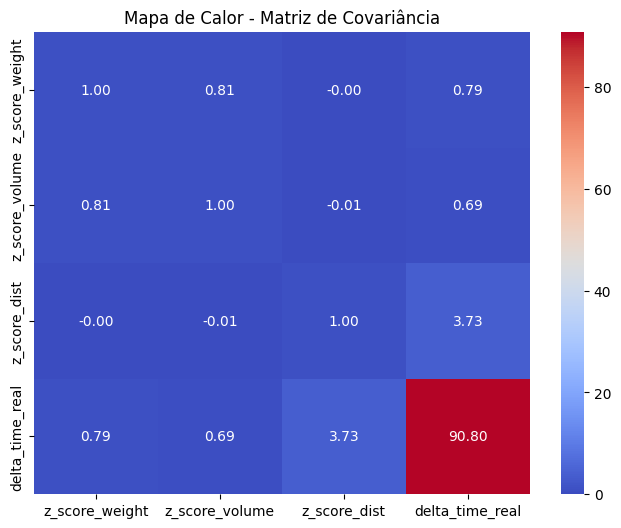

In [22]:
# Matriz de covariância
cov_matrix = dados_z.cov()

# Mapa de calor da matriz de covariância
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Matriz de Covariância")
plt.show();

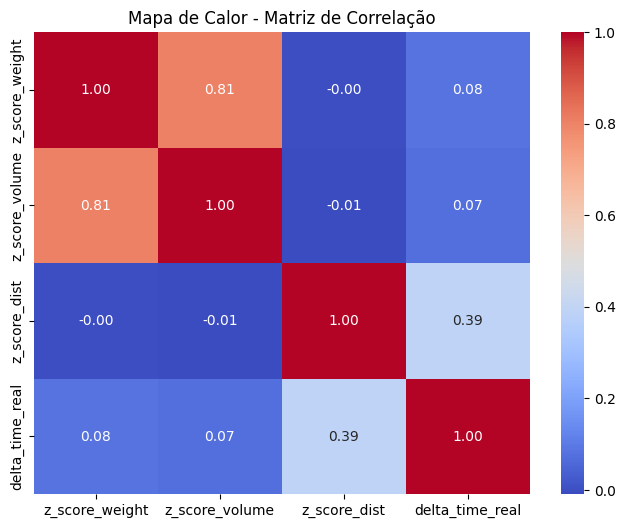

In [23]:
# Matriz de correlação
corr_matrix = dados_z.corr()

# Mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor - Matriz de Correlação")
plt.show();

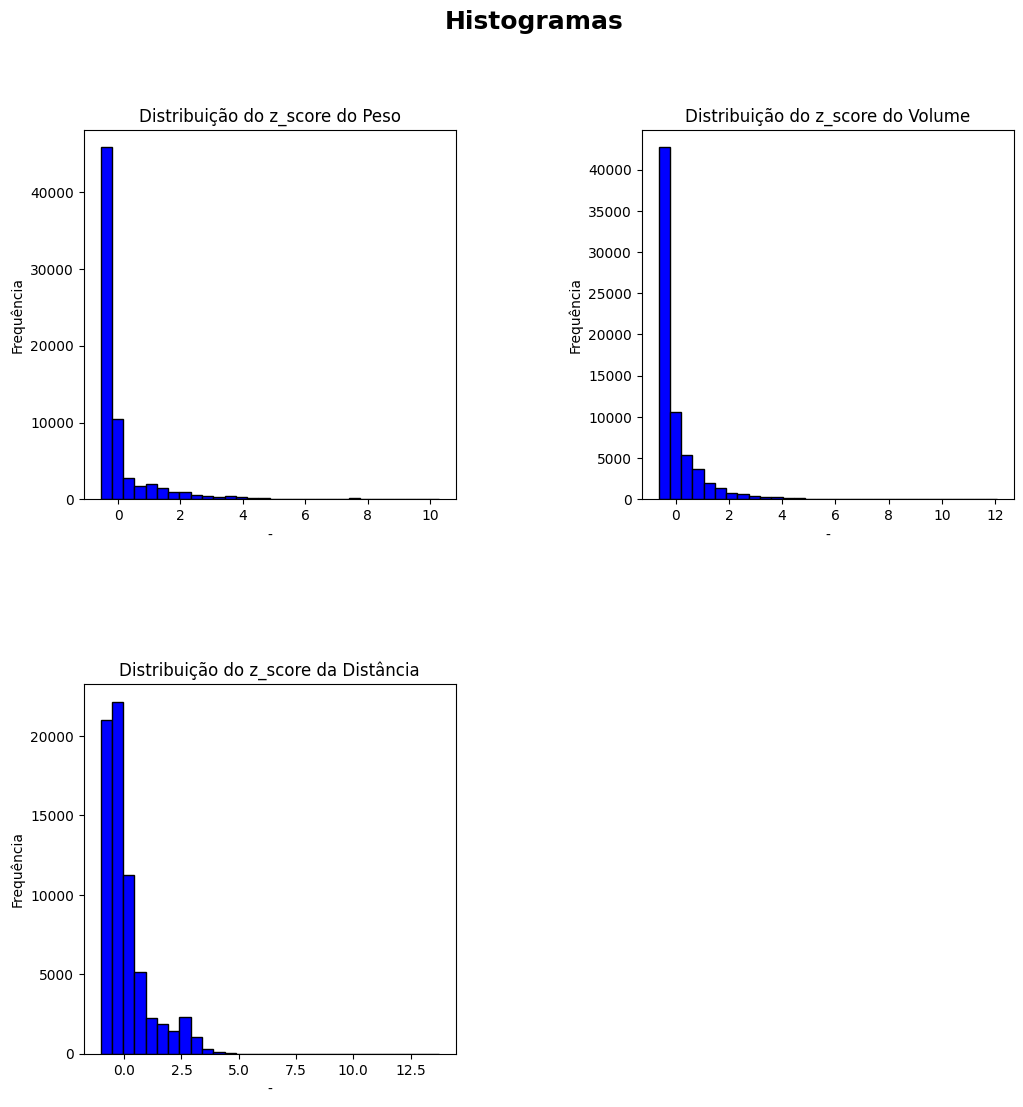

In [24]:
#Plotando os histogramas para as variáveis z_score:

colunas = ['z_score_weight', 'z_score_volume', 'z_score_dist']
titulos = ['Distribuição do z_score do Peso', 'Distribuição do z_score do Volume', 
           'Distribuição do z_score da Distância']
xlabels = ['-', '-', '-']

histogramas(desenvolvimento, colunas, titulos, xlabels)

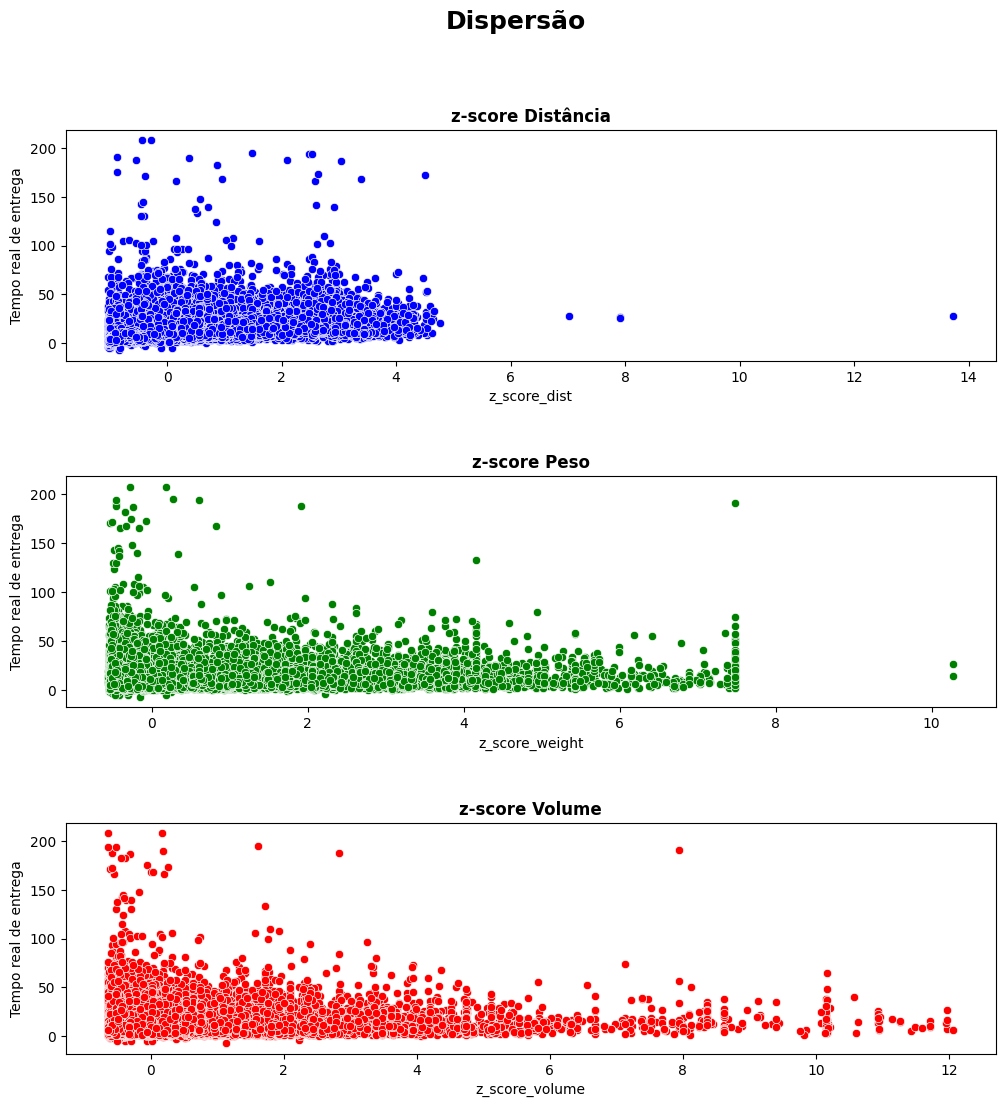

In [25]:
#Plotando os gráficos de dispersão das variáveis z_score:

dispersao(desenvolvimento,
          colunas=[('z_score_dist', 'delta_time_real'), 
                   ('z_score_weight', 'delta_time_real'), 
                   ('z_score_volume', 'delta_time_real')],
          titulos=['z-score Distância', 'z-score Peso', 'z-score Volume'],
          xlabels=['z_score_dist', 'z_score_weight', 'z_score_volume'],
          ylabels=['Tempo real de entrega', 'Tempo real de entrega', 'Tempo real de entrega'],
          colors=['blue', 'green', 'red'])

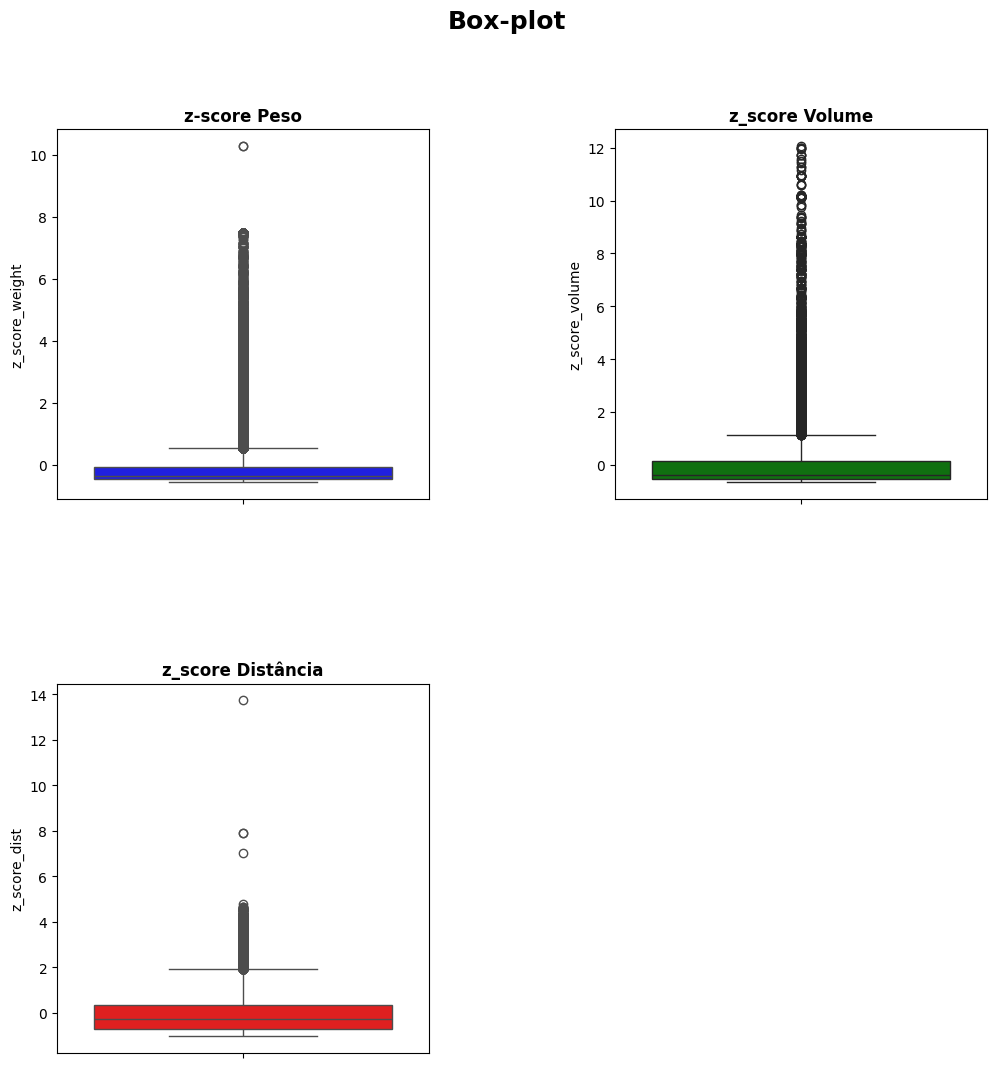

In [26]:
#Plotando o box-plot para as variáveis z_score:

box_plot(desenvolvimento,
         colunas=['z_score_weight', 'z_score_volume', 'z_score_dist'],
         titulos=['z-score Peso', 'z_score Volume', 'z_score Distância'],
         ylabels=['z_score_weight', 'z_score_volume', 'z_score_dist'],
         colors=['blue', 'green', 'red'])

### Dados de validação:

In [27]:
#Calculando o z-score para as variáveis explicativas:

#Distância:
validacao = z_score_col(validacao, 'dist_degrees', 'z_score_dist')

#Peso:
validacao = z_score_col(validacao, 'product_weight_kg', 'z_score_weight')

#Peso:
validacao = z_score_col(validacao, 'product_volume_l', 'z_score_volume')

In [28]:
#Tabela resumo:
estatisticas(validacao)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_weight_g,29486.000,2099.118,3745.710,0.000,300.000,700.000,1800.000,40425.000,700.000,1500.000
1,product_volume_cm3,29486.000,15170.610,23257.004,352.000,2856.000,6480.000,18240.000,288000.000,6480.000,15384.000
2,dist_degrees,29486.000,5.579,5.368,0.000,1.795,4.118,7.446,35.742,4.118,5.651
3,delta_time_dataset,29486.000,23.928,8.926,-6.000,19.000,23.000,29.000,140.000,23.000,10.000
4,delta_time_real,29486.000,11.895,9.441,-5.000,6.000,10.000,15.000,195.000,10.000,9.000
5,error_model_dataset,29486.000,-12.033,10.198,-124.000,-17.000,-13.000,-7.000,161.000,-13.000,10.000
6,product_volume_l,29486.000,15.171,23.257,0.352,2.856,6.480,18.240,288.000,6.480,15.384
7,product_weight_kg,29486.000,2.099,3.746,0.000,0.300,0.700,1.800,40.425,0.700,1.500
8,z_score_dist,29486.000,-0.000,1.000,-1.039,-0.705,-0.272,0.348,5.619,-0.272,1.053
9,z_score_weight,29486.000,-0.000,1.000,-0.560,-0.480,-0.374,-0.080,10.232,-0.374,0.400


### Modelo 2:

In [29]:
#Separando as variáveis explicativas e a resposta:
X = desenvolvimento[['z_score_volume', 'z_score_weight', 'z_score_dist']]
y = desenvolvimento['delta_time_real']

X_df = sm.add_constant(X)  # Adiciona a constante (intercepto)

# Ajustando o modelo de regressão linear aos dados de desenvolvimento
modelo = sm.OLS(y, X_df).fit()

# Exibindo os coeficientes da regressão
print(modelo.summary())

intercepto = modelo.params['const']  # Obtém o intercepto
print(f"\nEquação da regressão: y = {intercepto:.2f}", end="")

# Iterando sobre todas as variáveis explicativas e seus coeficientes
for col in X_df.columns[1:]:  # Ignora a constante na primeira coluna
    coeficiente = modelo.params[col]
    print(f" + {coeficiente:.2f} * {col}", end="")

print()  # Quebra de linha no final

                            OLS Regression Results                            
Dep. Variable:        delta_time_real   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     4382.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        17:35:05   Log-Likelihood:            -2.4670e+05
No. Observations:               68799   AIC:                         4.934e+05
Df Residuals:                   68795   BIC:                         4.934e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.9154      0.033    357.

In [30]:
#Calculando o z-score para as variáveis explicativas:

#Distância:
base_modelos = z_score_col(base_modelos, 'dist_degrees', 'z_score_dist')

#Peso:
base_modelos = z_score_col(base_modelos, 'product_weight_kg', 'z_score_weight')

#Peso:
base_modelos = z_score_col(base_modelos, 'product_volume_l', 'z_score_volume')

In [31]:
#Criando a coluna delta_time_model_2 com as predições da regressão múltipla,
#usando a fórmula y = 11.92 + 0.24 * z_score_volume + 0.61 * z_score_weight + 3.73 * z_score_dist :

base_modelos['delta_time_model_2'] = (0.2373*base_modelos['z_score_volume'] + 
                                       0.6052*base_modelos['z_score_weight'] +
                                       3.7336*base_modelos['z_score_dist'] + 11.9154)

In [32]:
#Criando a coluna estimated_delivery_model_2 do modelo 2:

#Alterando o tipo de dado de order_approved_at e 'order_delivered_customer_date':
#colunas = ['order_approved_at', 'order_delivered_customer_date']
#base_modelo2 = formato_data(base_completa, colunas)

#calculando a coluna estimated_delivery_model2:
base_modelos['estimated_delivery_model_2'] = (base_modelos['order_approved_at'] +
                                              pd.to_timedelta(base_modelos['delta_time_model_2'], unit = 'D'))

In [33]:
#Criando a coluna de erro do  modelo 2:

base_modelos['error_model_2'] = (base_modelos['order_delivered_customer_date'] - 
                                 base_modelos['estimated_delivery_model_2'] ).dt.days

In [34]:
#verificando as estatísticas:

tabela = base_modelos[['product_volume_l', 'product_weight_kg', 
                       'dist_degrees', 'z_score_weight',
                       'z_score_volume', 'z_score_dist', 'delta_time_real',
                       'delta_time_dataset', 'error_model_dataset',
                       'delta_time_model_1', 'error_model_1',
                       'delta_time_model_2', 'error_model_2']]

estatisticas(tabela)

,feature,quantidade,média,desvio-padrão,minimo,1Q,2Q,3Q,máximo,mediana,IQR
0,product_volume_l,98285.000,15.154,23.283,0.168,2.816,6.400,18.304,296.208,6.400,15.488
1,product_weight_kg,98285.000,2.089,3.735,0.000,0.300,0.700,1.800,40.425,0.700,1.500
2,dist_degrees,98285.000,5.569,5.384,0.000,1.762,4.084,7.419,79.601,4.084,5.656
3,z_score_weight,98285.000,-0.000,1.000,-0.559,-0.479,-0.372,-0.077,10.264,-0.372,0.402
4,z_score_volume,98285.000,-0.000,1.000,-0.644,-0.530,-0.376,0.135,12.071,-0.376,0.665
5,z_score_dist,98285.000,-0.000,1.000,-1.034,-0.707,-0.276,0.343,13.749,-0.276,1.051
6,delta_time_real,98285.000,11.909,9.503,-7.000,6.000,10.000,15.000,208.000,10.000,9.000
7,delta_time_dataset,98285.000,23.905,8.817,-6.000,18.000,23.000,29.000,154.000,23.000,11.000
8,error_model_dataset,98285.000,-11.996,10.211,-147.000,-17.000,-13.000,-7.000,188.000,-13.000,10.000
9,delta_time_model_1,98285.000,11.919,3.809,7.588,9.408,10.890,13.183,64.035,10.890,3.776


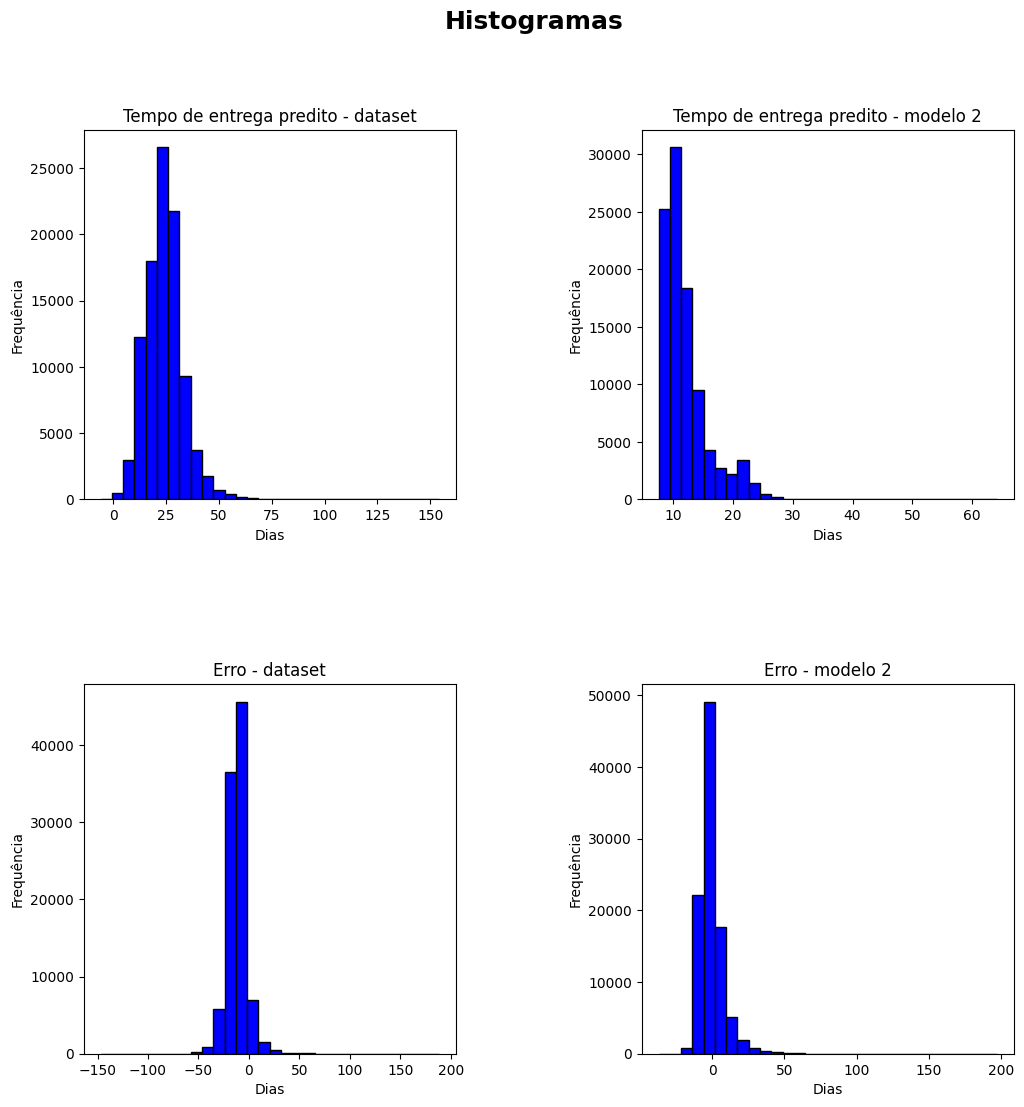

In [35]:
#Plotando os histogramas do modelo 2:

colunas = ['delta_time_dataset', 'delta_time_model_2', 'error_model_dataset', 'error_model_2' ]
titulos = ['Tempo de entrega predito - dataset', 'Tempo de entrega predito - modelo 2', 
           'Erro - dataset', 'Erro - modelo 2']
xlabels = ['Dias', 'Dias', 'Dias', 'Dias']

histogramas(base_modelos, colunas, titulos, xlabels)

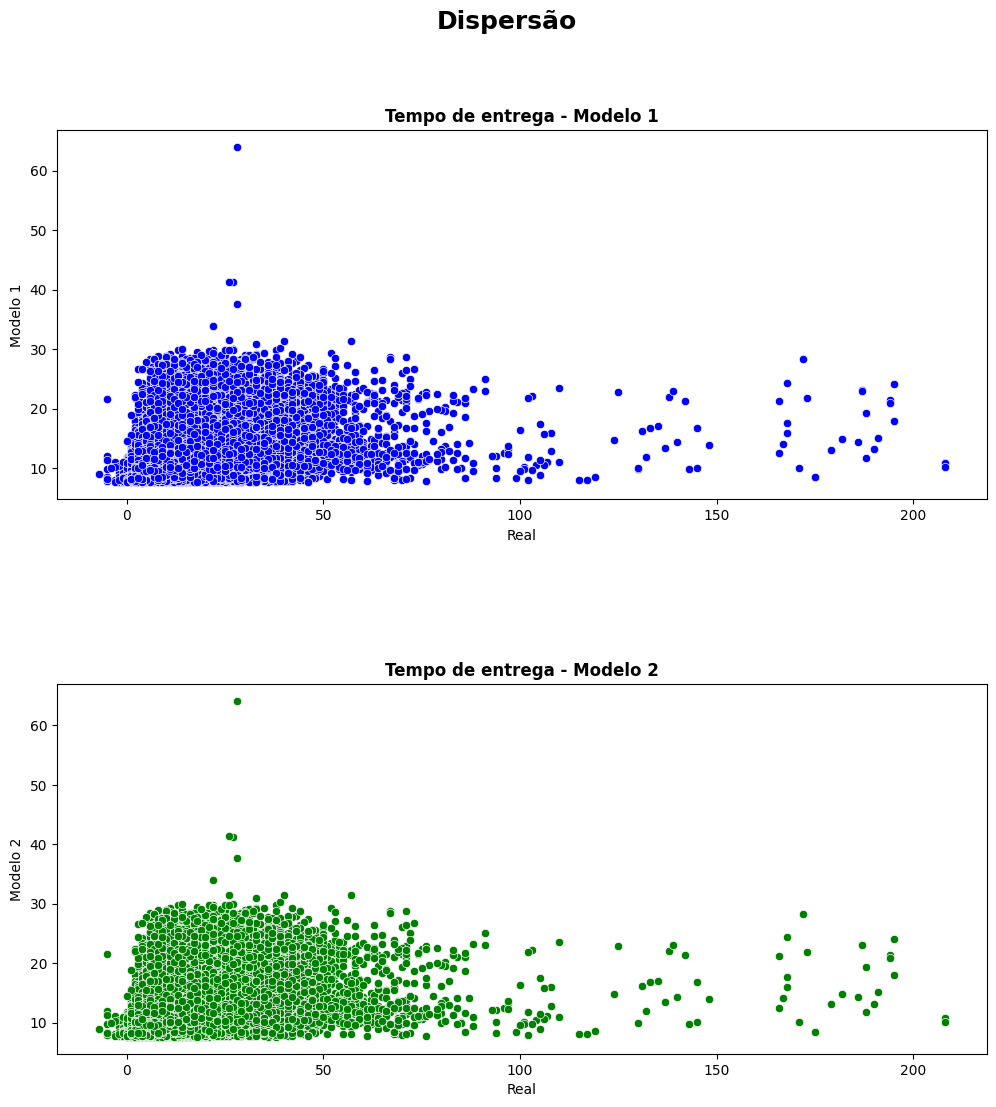

In [36]:
#Plotando os gráficos de dispersão dos modelos 1 e 2:

dispersao(base_modelos,
          colunas=[('delta_time_real', 'delta_time_model_1'), 
                   ('delta_time_real', 'delta_time_model_2')],
          titulos=['Tempo de entrega - Modelo 1', 'Tempo de entrega - Modelo 2'],
          xlabels=['Real', 'Real'],
          ylabels=['Modelo 1', 'Modelo 2'],
          colors=['blue', 'green'])

## Testes de Hipóteses:

In [37]:
#Selecionando as colunas:
base_testes = base_modelos[['product_category_name', 'delta_time_real',  'delta_time_model_2']]

In [38]:
#Calculando média e desvio-padrão da população:
media_geral = base_testes['delta_time_real'].mean()
desvio_padrao_pop = base_testes['delta_time_real'].std() 

### Nível de significância de 5%:

#### 1) A categoria “casa_conforto_2ˮ tem uma média amostral maior do tempo real de espera do que a média de todo o conjunto de dados?

In [39]:
# H0: média amostra <= média populacional
# H1: média amostra > média amostral

# Teste unicaudal:

# Filtrando a categoria "casa_conforto_2"
amostra = base_testes[base_testes['product_category_name'] == 'casa_conforto_2']['delta_time_real']

# Estatísticas da amosta:
media_amostral = amostra.mean() 
n = len(amostra)

# Calculando o Z-score
z = (media_amostral - media_geral) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste unilateral (maior que a média geral)
p_valor = 1 - stats.norm.cdf(z)

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.05:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'casa_conforto_2' é significativamente maior.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média da categoria é maior.")

Estatística Z: 1.0349
P-valor: 0.1503
Aceita H₀: Não há evidências suficientes para afirmar que a média da categoria é maior.


#### 2) A categoria “livros_importadosˮ tem uma média amostral menor do tempo real de espera do que a média de todo o conjunto de dados?

In [40]:
# H0: média amostra >= média populacional
# H1: média amostra < média amostral

# Teste unicaudal:

# Filtrando a categoria "livros_importados"
amostra = base_testes[base_testes['product_category_name'] == 'livros_importados']['delta_time_real']

# Estatísticas
media_amostral = amostra.mean()
n = len(amostra)

# Calculando o Z-score
z = (media_amostral - media_geral) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste unilateral (menor que a média geral)
p_valor = stats.norm.cdf(z)

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.05:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'livros_importados' é significativamente menor.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média da categoria é menor.")

Estatística Z: -3.4160
P-valor: 0.0003
Rejeita H₀: A média do tempo real de espera da categoria 'livros_importados' é significativamente menor.


#### 3) A categoria “instrumentos_musicaisˮ tem uma média amostral diferente do tempo real de espera do que a média de todo o conjunto de dados?

In [41]:
# H0: média amostra = média populacional
# H1: média amostra != média amostral

# Teste bicaudal:

# Filtrando a categoria "instrumentos_musicais"
amostra = base_testes[base_testes['product_category_name'] == 'instrumentos_musicais']['delta_time_real']

# Estatísticas
media_amostral = amostra.mean()
n = len(amostra)

# Calculando o Z-score
z = (media_amostral - media_geral) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.05:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'instrumentos_musicais' é significativamente diferente da média geral.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média da categoria é diferente da média geral.")

Estatística Z: 1.3007
P-valor: 0.1934
Aceita H₀: Não há evidências suficientes para afirmar que a média da categoria é diferente da média geral.


### Nível de significância de 1%:

#### 1) Na categoria “cds_dvds_musicaisˮ, a média do tempo real de espera é diferente da média do tempo de espera predito pelo modelo 2?

In [42]:
# H0: média predita = média real
# H1: média predita != média real

# Teste bicaudal:

# Filtrando a categoria "cds_dvds_musicais"
real_amostra = base_testes[base_testes['product_category_name'] == 'cds_dvds_musicais']['delta_time_real']
predito_amostra = base_testes[base_testes['product_category_name']== 'cds_dvds_musicais']['delta_time_model_2']

# Estatísticas
media_real = real_amostra.mean()
media_predita = predito_amostra.mean()
n = len(real_amostra)

# Calculando o Z-score
z = (media_predita - media_real) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.01:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'cds_dvds_musicais' é significativamente diferente da média predita pelo modelo 2.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.")

Estatística Z: 0.1827
P-valor: 0.8551
Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.


#### 2) Na categoria “floresˮ, a média do tempo real de espera é diferente da média do tempo de espera predito pelo modelo 2?
 

In [43]:
# H0: média predita = média real
# H1: média predita != média real

# Teste bicaudal:

# Filtrando a categoria "flores"
real_amostra = base_testes[base_testes['product_category_name'] == 'flores']['delta_time_real']
predito_amostra = base_testes[base_testes['product_category_name']== 'flores']['delta_time_model_2']

# Estatísticas
media_real = real_amostra.mean()
media_predita = predito_amostra.mean()
n = len(real_amostra)

# Calculando o Z-score
z = (media_predita - media_real) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.01:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'flores' é significativamente diferente da média predita pelo modelo 2.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.")

Estatística Z: 0.4940
P-valor: 0.6213
Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.


#### 3) Na categoria “musicaˮ, a média do tempo real de espera é diferente da média do tempo de espera predito pelo modelo 2?


In [44]:
# H0: média predita = média real
# H1: média predita != média real

# Teste bicaudal:

# Filtrando a categoria "musica"
real_amostra = base_testes[base_testes['product_category_name'] == 'musica']['delta_time_real']
predito_amostra = base_testes[base_testes['product_category_name']== 'musica']['delta_time_model_2']

# Estatísticas
media_real = real_amostra.mean()
media_predita = predito_amostra.mean()
n = len(real_amostra)

# Calculando o Z-score
z = (media_predita - media_real) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.01:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'musica' é significativamente diferente da média predita pelo modelo 2.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.")

Estatística Z: 0.4029
P-valor: 0.6870
Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.


#### 4) Na categoria “artigos_de_festasˮ, a média do tempo real de espera é diferente da média do tempo de espera predito pelo modelo 2?


In [45]:
# H0: média predita = média real
# H1: média predita != média real

# Teste bicaudal:

# Filtrando a categoria "artigos_de_festas"
real_amostra = base_testes[base_testes['product_category_name'] == 'artigos_de_festas']['delta_time_real']
predito_amostra = base_testes[base_testes['product_category_name']== 'artigos_de_festas']['delta_time_model_2']

# Estatísticas
media_real = real_amostra.mean()
media_predita = predito_amostra.mean()
n = len(real_amostra)

# Calculando o Z-score
z = (media_predita - media_real) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.01:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'artigos_de_festas' é significativamente diferente da média predita pelo modelo 2.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.")

Estatística Z: 2.2052
P-valor: 0.0274
Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.


#### 5) Na categoria “bebidasˮ, a média do tempo real de espera é diferente da média do tempo de espera predito pelo modelo 2?

In [46]:
# H0: média predita = média real
# H1: média predita != média real

# Teste bicaudal:

# Filtrando a categoria "bebidas"
real_amostra = base_testes[base_testes['product_category_name'] == 'bebidas']['delta_time_real']
predito_amostra = base_testes[base_testes['product_category_name']== 'bebidas']['delta_time_model_2']

# Estatísticas
media_real = real_amostra.mean()
media_predita = predito_amostra.mean()
n = len(real_amostra)

# Calculando o Z-score
z = (media_predita - media_real) / (desvio_padrao_pop / np.sqrt(n))

# Obtendo o p-valor para um teste bilateral (diferença em qualquer direção)
p_valor = 2 * (1 - stats.norm.cdf(abs(z)))

# Exibindo o resultado
print(f'Estatística Z: {z:.4f}')
print(f'P-valor: {p_valor:.4f}')

# Conclusão
if p_valor < 0.01:
    print("Rejeita H₀: A média do tempo real de espera da categoria 'bebidas' é significativamente diferente da média predita pelo modelo 2.")
else:
    print("Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.")

Estatística Z: 0.5336
P-valor: 0.5936
Aceita H₀: Não há evidências suficientes para afirmar que a média real da categoria é diferente da predita.
